# CS - 3. Common Algorithms - 3.6 Greedy Algorithms - 3.6.2 Kruskal's algorithm

Kruskal’s algorithm
Kruskal’s algorithm is a greedy algorithm that finds a minimum spanning tree for a connected weighted graph. It is a minimum spanning tree algorithm that takes a graph as input and finds the subset of the edges of that graph which form a tree that includes every vertex, where the total weight of all the edges in the tree is minimized. If the graph is not connected, then it finds a minimum spanning forest (a minimum spanning tree for each connected component).

크루스칼의 알고리즘은 연결된 가중 그래프에 대한 최소 스패닝 트리를 찾는 탐욕스러운 알고리즘입니다. 최소 스패닝 트리 알고리즘은 그래프를 입력으로 받아 모든 정점을 포함하는 트리를 형성하는 그래프의 가장자리 부분 집합을 찾는 알고리즘으로, 트리에 있는 모든 가장자리의 총 가중치가 최소화되는 알고리즘입니다. 그래프가 연결되지 않은 경우 최소 스패닝 포리스트(연결된 각 컴포넌트에 대한 최소 스패닝 트리)를 찾습니다.

크루스칼 알고리즘(Kruskal's algorithm)은

https://parkpakrsu.tistory.com/329
Data structures (with python) - 2. Graph - 2.3. Spanning Tree

에서 한번 다뤘습니다.

 

연결된 가중그래프에서 최소 스패닝 트리(최소 신장트리, MST, Minimum Spanning Tree)를 찾는 탐욕알고리즘입니다.

 

한번더 다루고 넘어가자면,

MST는 그래프 내의 모든 노드를 포함하는 트리입니다.

즉, 그래프의 최소 연결 부분 그래프입니다.

또한, 사이클이 포함되어서는 안됩니다.

 

주로 통신네트워크, 도로 네트워크등 에서 사용합니다.

## 알고리즘 원리
 

간선을 가중치의 오름차순 으로 정렬합니다.

가장 가중치가낮은 간선부터 차례대로 선택하되, 사이클을 형성하는 간선은 제외

이를 위해 유니온-파인드 알고리즘을 사용합니다.

(유니온-파인드 Union-Find 는 그래프 알고리즘으로 두 노드가 같은 그래프에 속하는지 판별하는 알고리즘입니다.)

 

## In Python

In [1]:
class Graph:
    def __init__(self, vertices):
        self.V = vertices
        self.graph = []
	# 그래프를 초기화한다.
    # vertices는 그래프의 정점의 수
    # self.graph 그래프의 간선을 저장하는 리스트

    def add_edge(self, u, v, w):
        self.graph.append([u, v, w])
	# u, v 는 간선의 양 끝 정점
    # w는 간선의 가중치

    def find(self, parent, i):
        if parent[i] == i:
            return i
        return self.find(parent, parent[i])
	#fine(self, parent, i)이 메서드에서 부모배열의 i 번째 정점의 루투를 찾는다.


    def union(self, parent, rank, x, y):
        xroot = self.find(parent, x)
        yroot = self.find(parent, y)
        if rank[xroot] < rank[yroot]:
            parent[xroot] = yroot
        elif rank[xroot] > rank[yroot]:
            parent[yroot] = xroot
        else :
            parent[yroot] = xroot
            rank[xroot] += 1
	# union 메서드는 두 개의 서로 다른 집합을 합친다.
    # x, y는 각각 집합을 대표하는 루트 정점
    # 이 메서드에서 두 집합의 rank를 비교해 랭크가 더 낮은 집합을 랭크가 더 높은 집합에 합친다.
    # 랭크가 같은 경우에는 한 집합을 다른 집합에 합치고 랭크를 1 증가시킨다.


    def kruskal(self):
        result = []
        i = 0
        e = 0
        self.graph = sorted(self.graph, key=lambda item: item[2])
        parent = []
        rank = []
        for node in range(self.V):
            parent.append(node)
            rank.append(0)
        while e < self.V - 1:
            u, v, w = self.graph[i]
            i += 1
            x = self.find(parent, u)
            y = self.find(parent, v)
            if x != y:
                e += 1
                result.append([u, v, w])
                self.union(parent, rank, x, y)
        return result

In [3]:
# 그래프 객체 생성. 정점의 개수는 4개
g = Graph(4)

# 간선 추가. 각각의 튜플은 (시작 정점, 끝 정점, 가중치)
g.add_edge(0, 1, 10)
g.add_edge(0, 2, 6)
g.add_edge(0, 3, 5)
g.add_edge(1, 3, 15)
g.add_edge(2, 3, 4)

result = g.kruskal()

# 결과 출력
for u, v, weight in result:
    print(f"Edge ({u}, {v}): Weight {weight}")


Edge (2, 3): Weight 4
Edge (0, 3): Weight 5
Edge (0, 1): Weight 10


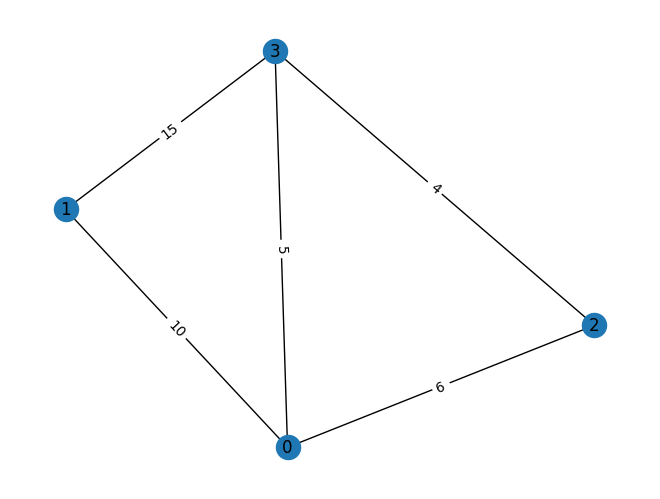

In [6]:
import networkx as nx
import matplotlib.pyplot as plt

# NetworkX 그래프 객체 생성
G = nx.Graph()

# 간선 추가. 각각의 튜플은 (시작 정점, 끝 정점, 가중치)를 나타냅니다.
G.add_edge(0, 1,weight=10)
G.add_edge(0, 2, weight=6)
G.add_edge(0, 3,weight= 5)
G.add_edge(1, 3, weight=15)
G.add_edge(2, 3, weight=4)

# 그래프 시각화
pos = nx.spring_layout(G)  # 정점의 위치를 결정
nx.draw(G, pos, with_labels=True)  # 그래프리기
labels = nx.get_edge_attributes(G, 'weight')  # 간선의 가중치를 가져와서 레이블로 사용
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)  # 간선의 레이블 그리기

plt.show()  # 그래프 출력


 

크루스칼 알고리즘의 시간 복잡도는 O(E log E) 입니다.

E 는 edge로 그래프 간선의 개수입니다.

 

왜 O(E log E)일까요?

크루스칼 알고리즘은 시작할 떄 모든 간선을 가중치에 따라 오름차순으로 정렬해야 합니다.

이 정렬 과정이 가장 시간이 많이 걸리는 부분입니다. 이부분이 바로 O(E log E) 시간 이 소요됩니다.

 

그 다음 단계에서 각 간선을 순회하며 사이클을 형성하는지 확인합니다.

이는 각 간선마다 'Find', 'Union' 연산을 수행하는 것을 포함하는데, 이 두 연산은 거의 상수 시간에 수행됩니다.

따라서 O(E) 시간이 소요됩니다.

 

이 O(E log E)이므로 간선이 많은 밀집 그래프에서도 효율적으로 작동합니다.

 

## 문제
최소 스패닝 트리 - 백준 1197 (https://www.acmicpc.net/problem/1197)

네트워크 연결 - 백준 1922 (https://www.acmicpc.net/problem/1922)